In [5]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"

In [6]:
df = pd.read_csv("data/air_passengers.csv", index_col=0)
df.index = pd.to_datetime(df.index)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
#First divide the data into train and test 

# Train/test split
train_df = df[:-24]
test_df = df[-24:]

# Stationary Data  

https://towardsdatascience.com/how-to-forecast-with-moving-average-models-6f3c9cbba60d

## Exponential Smoothing

$\hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t$

Where:

$\hat{y}_{t+1}$ is the forecast value at time $t+1$

$y_t$ is the observed value at time $t$

$\alpha$ is the smoothing factor, a value between 0 and 1 that determines the weight given to the most recent observation. The closer 

$\alpha$ is to 1, the more weight is given to the most recent observation.

$\hat{y}_t$ is the forecast value at time $t$

c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


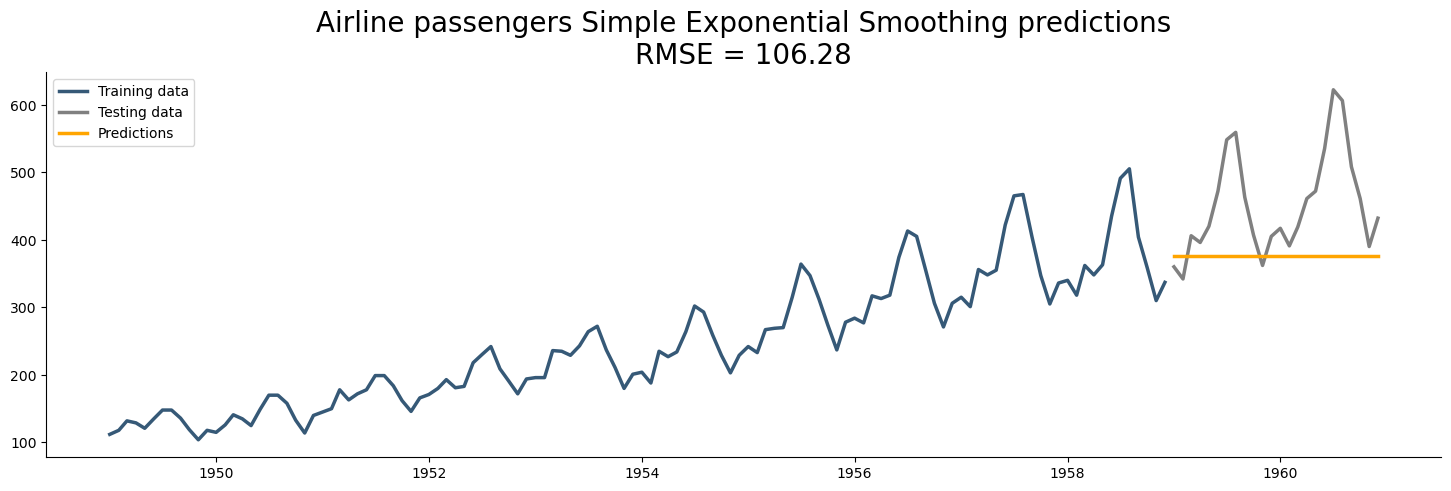

In [8]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# Model parameters
span = 12 
alpha = 2 / (span + 1)

# Train the model
model = SimpleExpSmoothing(train_df['Passengers'])
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=24)

# Evaluate
rmse = mean_squared_error(test_df['Passengers'], predictions, squared=False)

# Plot
plt.title(f'Airline passengers Simple Exponential Smoothing predictions\nRMSE = {np.round(rmse, 2)}', size=20)
plt.plot(train_df['Passengers'], label='Training data')
plt.plot(test_df['Passengers'], color='gray', label='Testing data')
plt.plot(predictions, color='orange', label='Predictions')
plt.legend()

# With Trend
## Double Exponential Smoothing

The formula for double exponential smoothing (also known as Holt's method) is:

$\hat{y}_{t+1} = \alpha (y_t - \hat{y}_{t-1} + b_{t-1}) + \hat{y}_t$

$b_{t+1} = \beta (\hat{y}_{t+1} - \hat{y}_t) + (1 - \beta) b_{t-1}$

Where:

$\hat{y}_{t+1}$ is the forecast value at time $t+1$

$y_t$ is the observed value at time $t$

$\hat{y}_t$ is the forecast value at time $t$

$b_{t+1}$ is the slope of the trend at time $t+1$

$\hat{y}_{t-1}$ is the forecast value at time $t-1$

$b_{t-1}$ is the slope of the trend at time $t-1$

$\alpha$ and $\beta$ are smoothing factors, values between 0 and 1 that determine the weight given to the most recent observation and the most recent slope, respectively. The closer $\alpha$ and $\beta$ are to 1, the more weight is given to the most recent observation and slope, respectively.

c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


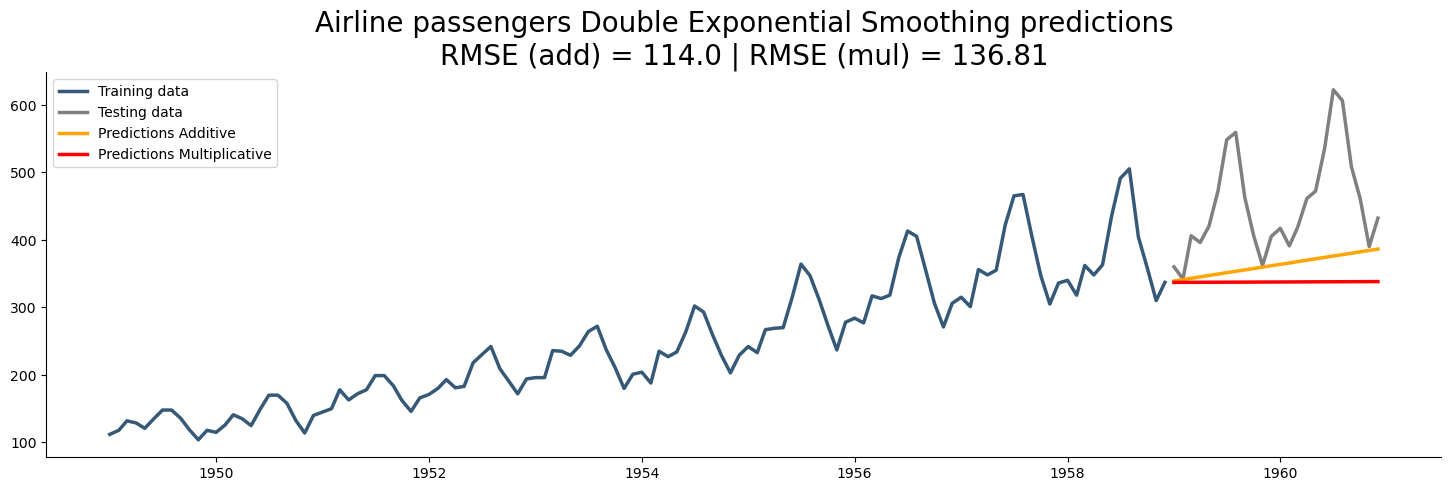

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Additive model
model_add = ExponentialSmoothing(train_df['Passengers'], trend='add')
results_add = model_add.fit()
predictions_add = results_add.forecast(steps=24)

# Multiplicative model
model_mul = ExponentialSmoothing(train_df['Passengers'], trend='mul')
results_mul = model_mul.fit()
predictions_mul = results_mul.forecast(steps=24)

# Evaluate
rmse_add = mean_squared_error(test_df['Passengers'], predictions_add, squared=False)
rmse_mul = mean_squared_error(test_df['Passengers'], predictions_mul, squared=False)

# Plot
plt.title(f'Airline passengers Double Exponential Smoothing predictions\nRMSE (add) = {np.round(rmse_add, 2)} | RMSE (mul) = {np.round(rmse_mul, 2)}', size=20)
plt.plot(train_df['Passengers'], label='Training data')
plt.plot(test_df['Passengers'], color='gray', label='Testing data')
plt.plot(predictions_add, color='orange', label='Predictions Additive')
plt.plot(predictions_mul, color='red', label='Predictions Multiplicative')
plt.legend()

# With Trend and Seasonality
## Triple Exponential Smoothing


$\hat{y}_{t+1} = \alpha (y_t - \hat{y}_{t-1} + b_{t-1} + c_{t-2}) + \hat{y}_t $

$b_{t+1} = \beta (\hat{y}_{t+1} - \hat{y}_t) + (1 - \beta) b_{t-1}$

$c_{t+1} = \gamma (\hat{y}_{t+1} - \hat{y}_{t-1} - b_{t-1} + c_{t-2}) + (1 - \gamma) c_{t-2}$


Where:

ŷ(t+1) is represented by $\hat{y}_{t+1}$

yt is represented by $y_t$

ŷ(t) is represented by $\hat{y}_t$

b(t+1) is represented by $b_{t+1}$

c(t+1) is represented by $c_{t+1}$

ŷ(t-1) is represented by $\hat{y}_{t-1}$

b(t-1) is represented by $b_{t-1}$

c(t-2) is represented by $c_{t-2}$

α is represented by $\alpha$

β is represented by $\beta$

γ is represented by $\gamma$

c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


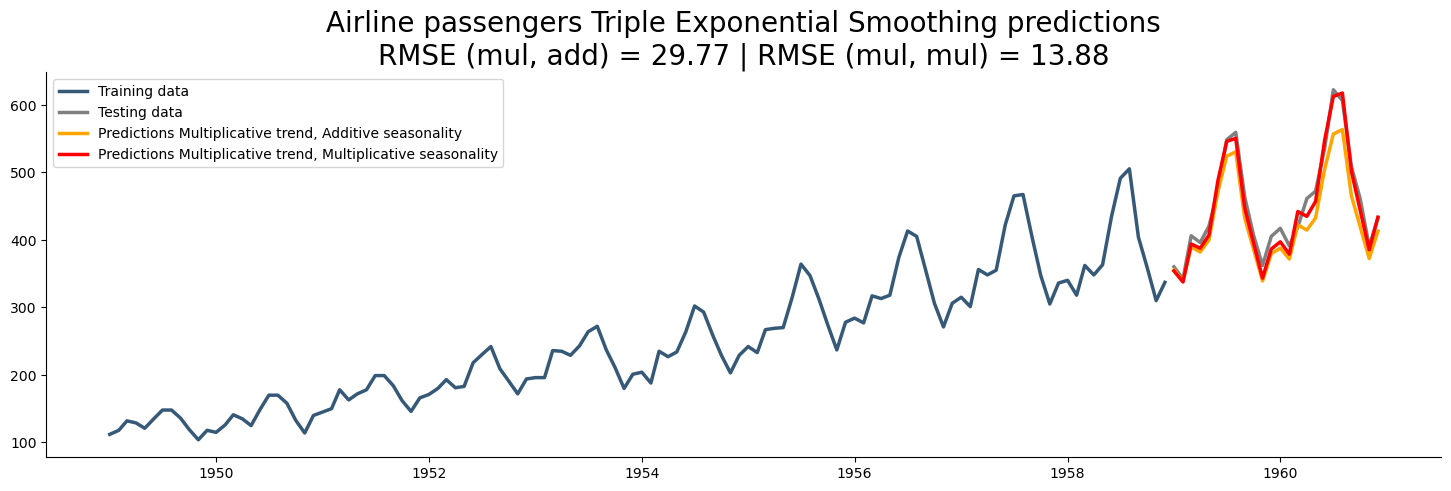

In [10]:
# Multiplicative trend / Additive seasonality model
model_mul_add = ExponentialSmoothing(train_df['Passengers'], trend='mul', seasonal='add', seasonal_periods=12)
results_mul_add = model_mul_add.fit()
predictions_mul_add = results_mul_add.forecast(steps=24)

# Multiplicative trend / Multiplicative seasonality model
model_mul_mul = ExponentialSmoothing(train_df['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12)
results_mul_mul = model_mul_mul.fit()
predictions_mul_mul = results_mul_mul.forecast(steps=24)

# Evaluate
rmse_mul_add = mean_squared_error(test_df['Passengers'], predictions_mul_add, squared=False)
rmse_mul_mul = mean_squared_error(test_df['Passengers'], predictions_mul_mul, squared=False)

# Plot
plt.title(f'Airline passengers Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)} | RMSE (mul, mul) = {np.round(rmse_mul_mul, 2)}', size=20)
plt.plot(train_df['Passengers'], label='Training data')
plt.plot(test_df['Passengers'], color='gray', label='Testing data')
plt.plot(predictions_mul_add, color='orange', label='Predictions Multiplicative trend, Additive seasonality')
plt.plot(predictions_mul_mul, color='red', label='Predictions Multiplicative trend, Multiplicative seasonality')
plt.legend()

## Auto Arima

https://pypi.org/project/pmdarima/

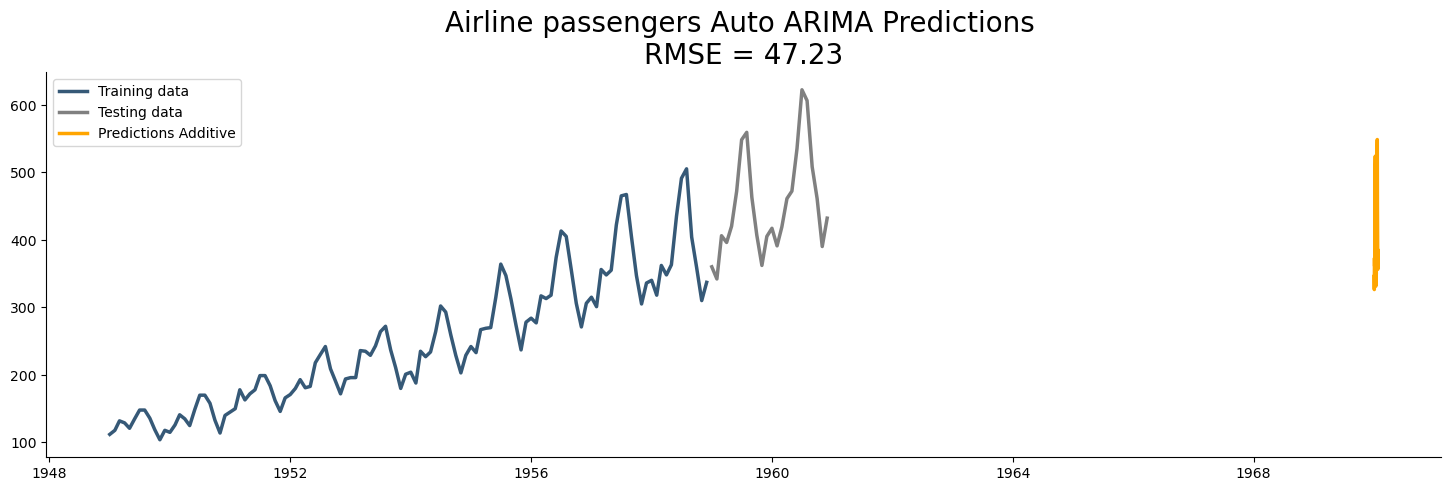

In [12]:
import pmdarima as pm
y = df.values
# Fit model
model = pm.auto_arima(train_df, seasonal=True, m=12)
auto_arima_forecast = model.predict(test_df.shape[0])


# Evaluate
rmse_auto_arima = mean_squared_error(test_df['Passengers'], auto_arima_forecast, squared=False)


x = np.arange(y.shape[0])
# Plot
plt.title(f'Airline passengers Auto ARIMA Predictions \nRMSE = {np.round(rmse_auto_arima, 2)}', size=20)
plt.plot(train_df['Passengers'], label='Training data')
plt.plot(test_df['Passengers'], color='gray', label='Testing data')
plt.plot(auto_arima_forecast, color='orange', label='Predictions Additive')
plt.legend()